# Framingham Heart Study

**Analysis & Modelling done by Gaurav S. Padawe**

**Domain : Healthcare**

### Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?**
    - Source
    - Details
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype

#### 3. **Data Cleansing & EDA**
    - Checking Null values
    - Correlation Heatmap
    - Null values Imputation
    - Descriptive Statistics
    - EDA (Phase 1)
    - Mean Encoding
    - EDA (Phase 2)
    - Logarithmic Transformation

#### 4. **Normalization**

#### 5. **Modelling**
    - Splitting Data & Choosing Algorithms
    - Logistic Regression Implementation
    - Logistic Regression (Adding Class weight parameter)
    - Over-Sampling Dataset (SMOTE)
    - Logistic Regression Implementation
    - Evaluating Metrics (R2 and RMSLE)

#### 6. **Conclusion**

#### 7. **What's next ?**<br><br>


### Reason for Choosing this Dataset ?**

- <i>The Reason behind choosing this model is my Personal Interest to explore various Domains out there.</i>
- <i>I want to investigate how Machine Learning can help Healthcare industries to become Data-Driven. Where, ML can predict the likelihood of subject who can suffer from a particular disease. Thereby, respective actions in the form of Treatments or Preventive Measures would be brought into consideration on the Individual.</i>
- <i>However, this Statistical models are not prepared to use for production environment.</i>


### Source (Download On Request) :
- https://biolincc.nhlbi.nih.gov/teaching/**

### Details :

The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.

The dataset is a rather small subset of possible FHS dataset, having 4240 observations and 16 variables. The variables are as follows:

- sex : the gender of the observations. The variable is a binary named “male” in the dataset.
- age : Age at the time of medical examination in years.
- education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- currentSmoker: Current cigarette smoking at the time of examinations
- cigsPerDay: Number of cigarettes smoked each day
- BPmeds: Use of Anti-hypertensive medication at exam
- prevalentStroke: Prevalent Stroke (0 = free of disease)
- prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- diabetes: Diabetic according to criteria of first exam treated
- totChol: Total cholesterol (mg/dL)
- sysBP: Systolic Blood Pressure (mmHg)
- diaBP: Diastolic blood pressure (mmHg)
- BMI: Body Mass Index, weight (kg)/height (m)^2
- heartRate: Heart rate (beats/minute)
- glucose: Blood glucose level (mg/dL)

And finally the response variable : + TenYearCHD : The 10 year risk of coronary heart disease(CHD).


**Questionnaire :**

- What is the spread of each attribute in the given data set ?

- Can we get the count of CHD w.r.t to Gender ?

- Can we group people of certain age together and figure out how Sys. BP and Dia. BP affects by Age group ?

- How is our Target variable distributed ? is it Imbalanced ?


**Objective :**

- The goal is to make some predictive models on a FHS dataset, and reviewing some exploratory and modelling techiniques.

### Loading Data

In [ ]:
#importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the Dataset

df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Shape of dataset

print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 4240 
No. of Features :  16


- We can see that our Dataset contains 4240 examples / predictors and 16 features (including Target).

In [4]:
#Let us check datset's attribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


- Above results shows us that we've :
    - **(7) x int64** datatype attributes
    - **(9) x float64** datatype attributes.

### Data Cleansing and EDA

In [5]:
#Examining Null values in each feature

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#%percent null values

df.isnull().sum() / df.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

- We can examine that we got null values in following features :<b>
    - education          (105) - 2.47%
    - cigsPerDay          (29) - 0.68%
    - BPMeds              (53) - 1.25%
    - totChol             (50) - 1.17%
    - BMI                 (19) - 0.44%
    - heartRate            (1) - 0.02%
    - glucose            (388) - 9.15%

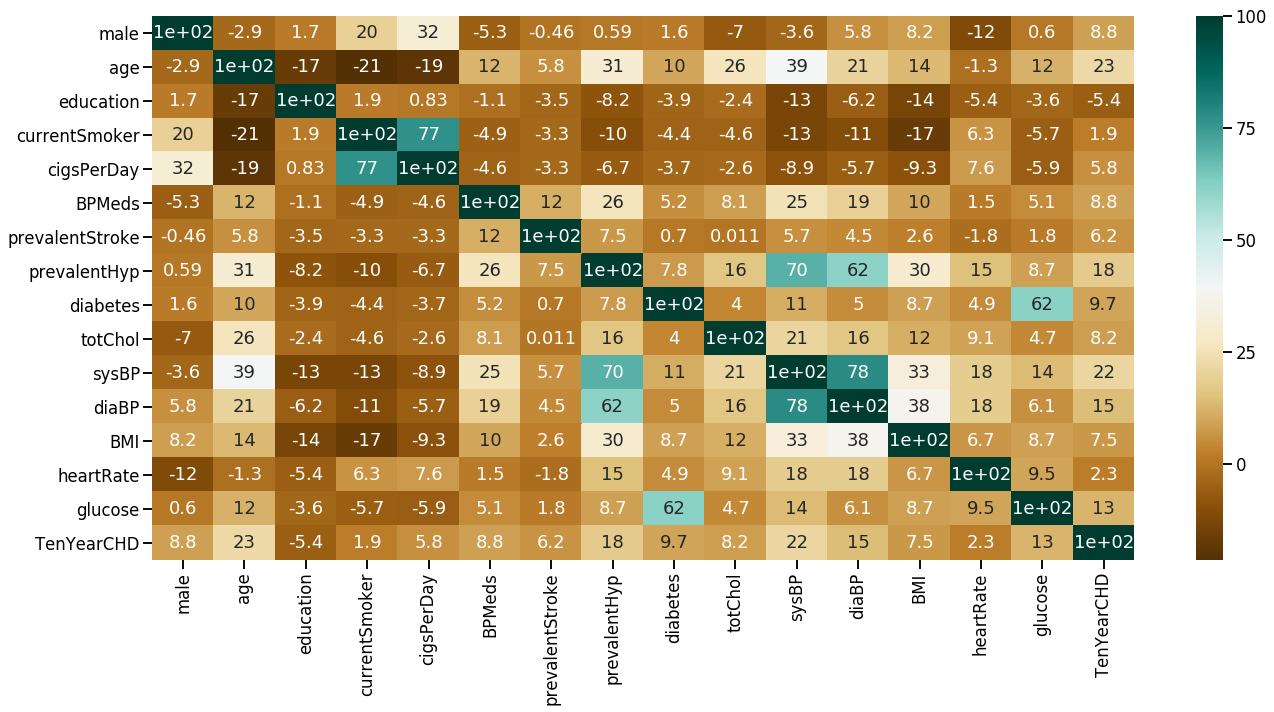

In [7]:
#Pearson Correlation

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='BrBG')

**Observations :**

Correlation plot gives us valuable information regarding Relation within Attributes. It can Either be Negative or Positive or Nill. We need to always keep 1 feature from 2 Strongly Correlated ones but since we want to perform EDA we'll keep all and drop them before modelling.

- **currentSmoker & cigsPerDay** has strong Correlation of 77 (Scaled for better Observations)


- **prevalentHyp vs sysBP / diaBP** are having Positive Correlation of 70 and 62.


- While, **glucose & diabetes** are postively Correlated.


- **sysBP & diaBP** are also having Positive Correlation.

**Usually we fill Null Values with Measures of Central Tendency (Mean / Median / Mode) or we've techniqus like Forward / Backward fill but in this case we can observe the Correlation plot and consider it to Fill missing values. E.g., We have Positive Correlation between currentSmoker & cigsPerDay, we know that currentSmoker has values either 1 (is a Smoker) or 0 (is not a Smoker), we can groupby currentSmoker and Impute Missing values based on Median. We can do the same for BMI based on male (Gender) & Age.** 

In [ ]:
#User defined function for missing value imputation

def impute_median(data):
    return data.fillna(data.median())

In [ ]:
#median imputation

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [10]:
#Rechecking if we have any missing value left

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### EDA

- We'll explore various features in this section and perform Univariate, Bivariate & Multivariate Analysis.


- We'll observe descriptive statistics which will give us brief idea about spread of individual features.


- Visualizing Target attribute will shows us if we've imbalanced dataset.

In [11]:
#Descriptive Stats

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Observations :**

Some the features are Discrete so let us analyze continuous ones

- **Age** : We can see that Min. age of subject found in given records is 32 while Max. being 70. So our values are ranging from 32 to 70.


- **cigsPerDay** : Subject smoking Cig. per day is as low as nill while we have 70 Cigs. per day making the Peak.


- **totChol** : Min. Cholesterol level recorded in our dataset is 107 while Max. is 696.


- **sysBP** : Min. Systolic Blood Pressure observed in Subject is 83 while Max. is 295.


- **diaBP** : Min. Diastolic Blood Pressure observed in Subject is 48 while Max. is 142.


- **BMI** : Body Mass Index in our dataset ranges from 15.54 to 56.


- **heartRate** : Observed Heartrate in our case study is 44 to 143.


- **glucose** : Glucose sugar level range is 40 to 394.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CHD by Gender')

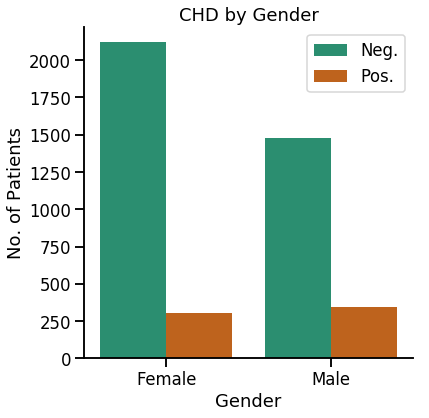

In [12]:
#CHD by Gender Viz.

sns.catplot(x='male', hue='TenYearCHD', data=df, kind='count', palette='Dark2', size=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

**Observations :**

- Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).


- Observations tells us that we've Excessive number of people who are not suffering from CHD.
    - **Negative** : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.
    - **Positive** : While Approx. 10% of Females & Males are suffering from CHD.
    

- By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

Text(0.5, 1.0, 'Distribution of HeartRate')

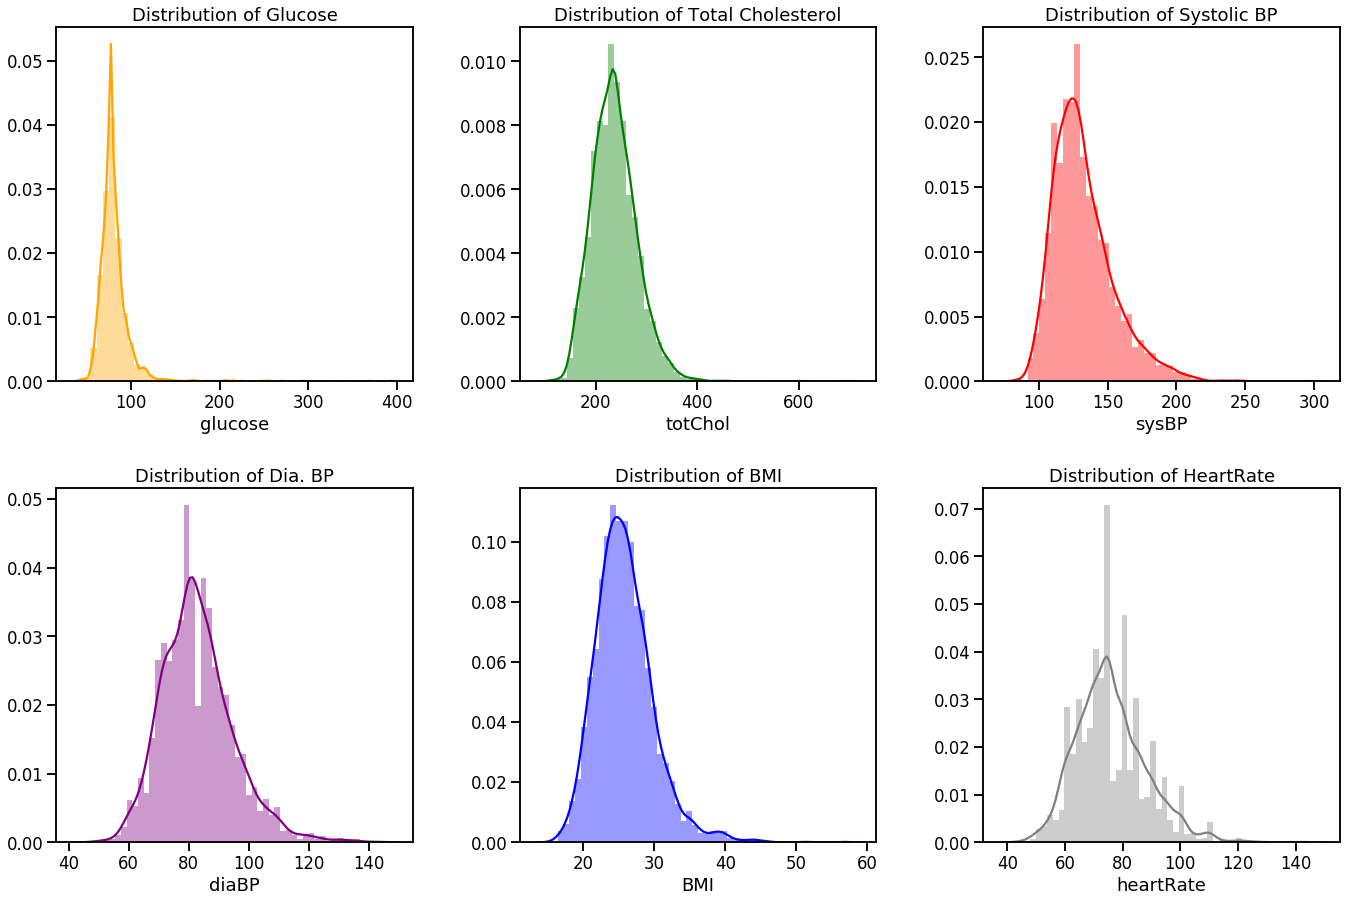

In [13]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

**Observations :**

- We can see **Glucose, Total Cholesterol, Systolic BP & BMI** is **Right Skewed.**


- While **Diastolic BP & Heart Rate** are close to **Normal / Gaussian Distribution.**

Text(0.5, 1.0, 'Agewise distribution of the patients')

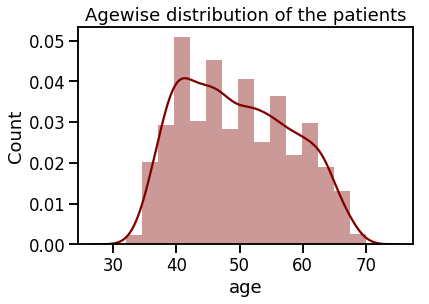

In [14]:
sns.distplot(df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

**Observation :**

- Subjects ranging from Age 40 to 50 are in Majority followed by 50 to 70.


- Let us define a user-defined Function to encode Age.

In [ ]:
#User-defined function

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

- Above Functions will Encode Age and Heart Rate.


- We can encode the Age Group Further :
    - Subject with **Age <= 40** are **Adults.**
    - Subject with **Age > 40 and <= 55** are **Middle-Aged Adult.**
    - Subject **Above 55** will fall in **Senior** Category.


- We'll Encode HeartRate as follows:
    - HeartRate **<= 60** is **Low / Resting** HeartBeat.
    - HeartRate **between 60 to 100** is considered as **Normal.**
    - While, HeartRate **above 100** is **High.**

Text(0.5, 1.0, 'Count by Age Group')

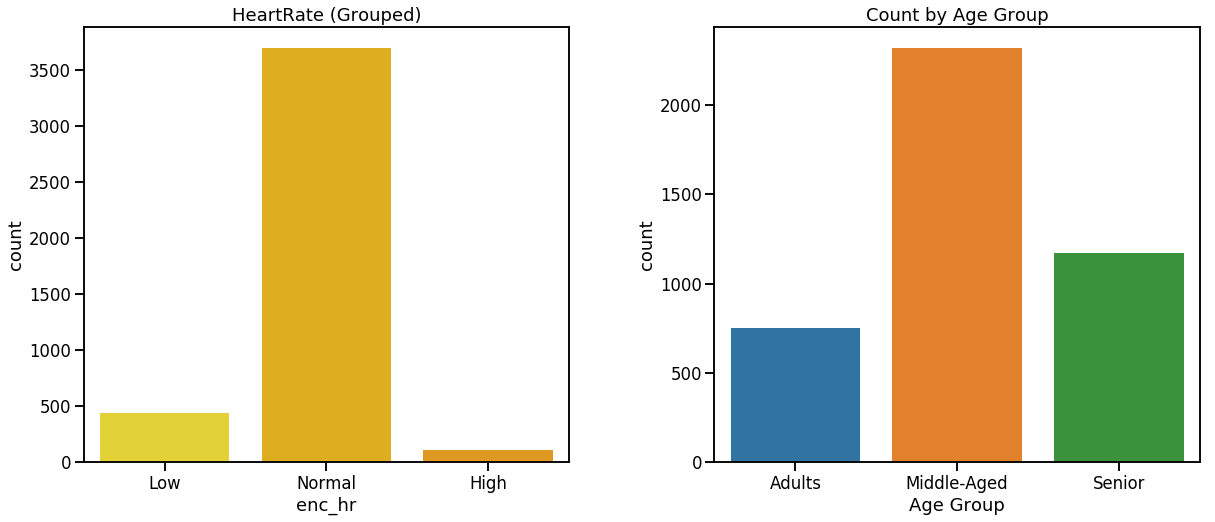

In [16]:
#HeartRate (Grouped) Count

plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
sns.countplot(df['enc_hr'], palette='Wistia')
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

plt.subplot(1, 2, 2)
sns.countplot(df['encode_age'])
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')

- We can observe that Subject with Normal HeartRate are in Majority followed by Resting / Low HeartRate and High HeartRate.


- We've more number of Middle-Aged Adults in our Dataset followed by Seniors And then Adults.

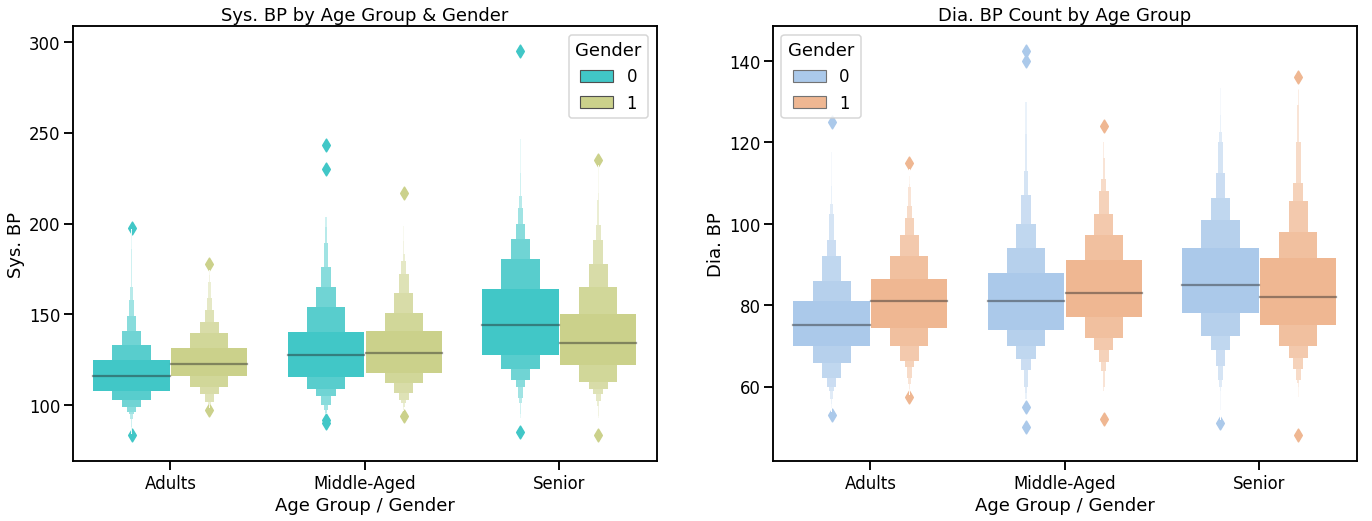

In [17]:
#Multivariate Analysis Pt. 2

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

**Observations :**

- **Sys. BP by Age Group & Gender** : Sys. BP is Increasing by Age Group and Gender.


- **Dia. BP by Age Group & Gender** : Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

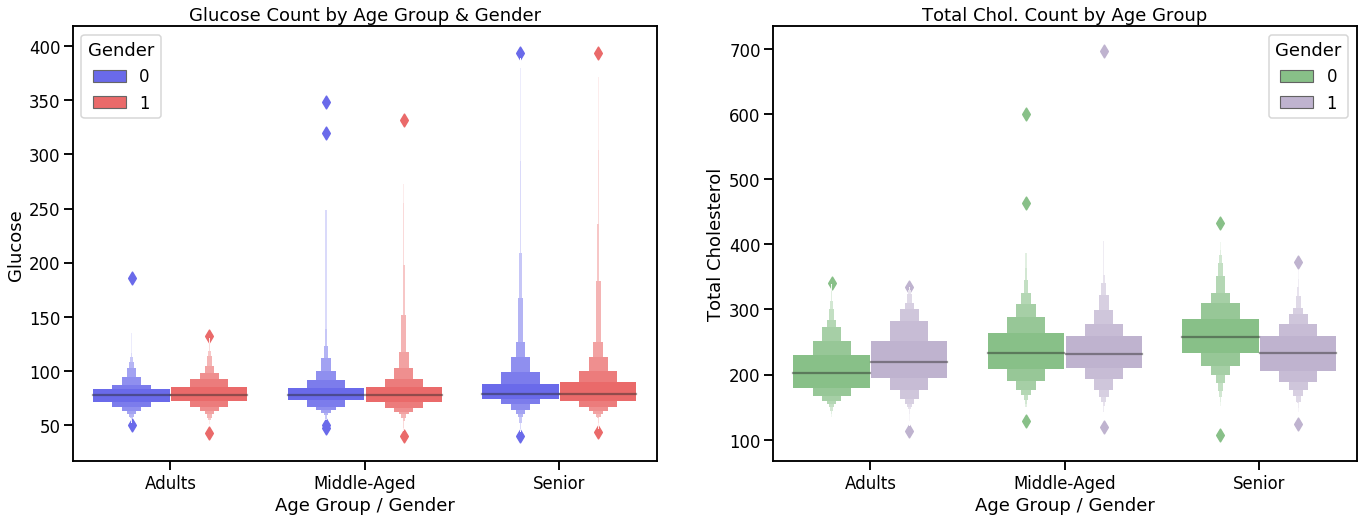

In [18]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=df, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=df, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

**Observations :**

- **Glucose Count by Age Group & Gender** : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.


- **Total Cholesterol by Age Group & Gender** : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Cigs. per day by Age Group')

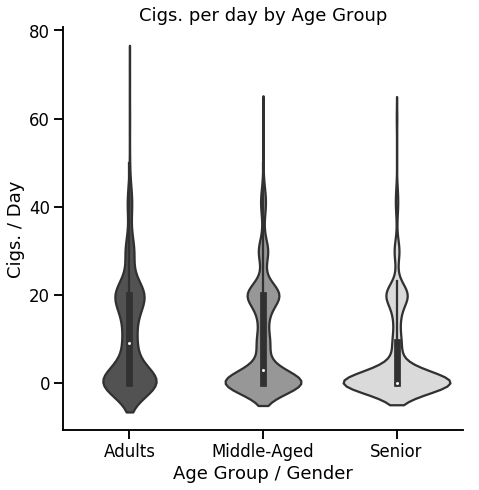

In [19]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

**Observation :**

- **Adults** : In Adults we can observe that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.


- **Middle-Aged** : In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.


- **Senior** : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Diabetes by Age Group')

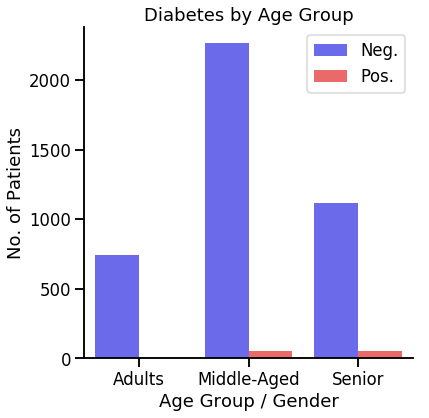

In [20]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='seismic', size=6, legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

**Observation :**

- **Adults** : Subject with Negative Diabetes Diagnosis are approx. 800 count while Positive Diabetes Diagnosis is Almost Nill.


- **Middle-Aged** : Subject with Negative Diabetes Diagnosis are reaching the Peak of Approx. 2500 Count while Positive Count is Under 100.


- **Senior** : Subject diagnosed Negative are Approx. 1000 while Positive Count is Under 100.

Text(0.5, 1.0, 'Target Class Count')

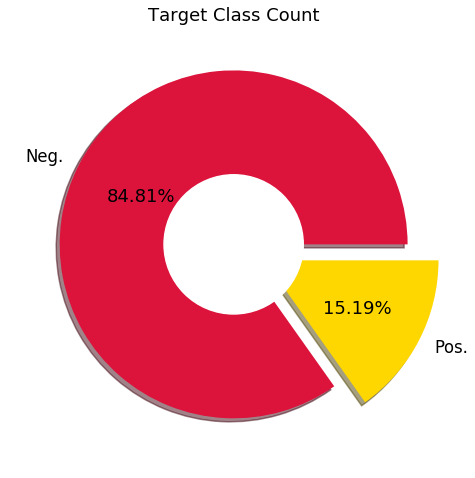

In [21]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

**Observations :**

- We can see that we've Imbalanced Dataset here having ratio of 85:15 where Positive Class is Minor.


- We'll need to Over-sample the Dataset in this case to get the best out of it.


- But before we proceed with Over-Sampling we'll First try Basic Logistic Regression Model on Data we had processed. 

In [ ]:
#Making a copy of Dataset

df_copy = df.copy()

In [23]:
#Reading data

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [ ]:
#Log Transform Continuous Variables

df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
#df_copy['log_sysBP'] = np.log1p(df_copy['sysBP'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

df_copy.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
              'currentSmoker', 'education', 'enc_hr', 'encode_age'], axis=1, inplace=True)

- Above we had performed Logarithmic Transformations to get rid of Ouliers which have in Continuous Variables.


- Also, we're dropping those features on which we had performed Log Transformations.


- We're also dropping "Education" as it is an unwanted feature here.

In [25]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['TenYearCHD'], axis=1).index)                     
norm_df.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,log_cigsPerDay,log_totChol,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,-0.958976,-1.130247,0.366175,0.417050,-0.179487,-1.296260
1,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,0.389489,-0.094351,0.781994,1.522102,-0.246230,-0.347297
2,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,1.143043,0.279789,-0.182594,-0.042965,0.002631,-0.665854,-0.102079
3,-0.867217,-0.173569,-0.077014,1.489778,-0.162437,1.408036,-0.182514,1.039278,0.747528,-0.914968,1.308555,1.282600
4,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,1.233898,1.101174,0.164064,-0.648574,0.806637,0.325550,-0.347297


- Above we had Standard Scaled Data to Normalize the Dataset.


- And we've created new Dataset as norm_df


- We're dropping few features here because they are Positively Correlated (As we saw in Correlation Plot) 

### Building Model

- In this section we'll split dataset into Training & Validation set.


- We'll build a basic Logistic Regression model on data as is.

In [26]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = df_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3180, 12), (1060, 12), (3180,), (1060,))

- Now we've 3180 Records For Training and 1060 Records for Evaluation / Validation.


- Ahead, we'll put forth Logistic Regression as our Estimator.

### Logistic Regression

- Logistic Regression is always a best approach before moving ahead to complex Algorithms.


- Most of the times if we have done good Feature Engineering then algorithms as simple as Logistics Regression can give us fairly acceptable results.


- We will choose our solver as "liblinear" because our dataset isn't big to try other solvers so we'll go ahead with "liblinear"

In [27]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)
log_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.8603773584905661
Cross Validation Score :  0.8481173535663423
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.83      0.03      0.06       152

    accuracy                           0.86      1060
   macro avg       0.85      0.52      0.49      1060
weighted avg       0.86      0.86      0.80      1060



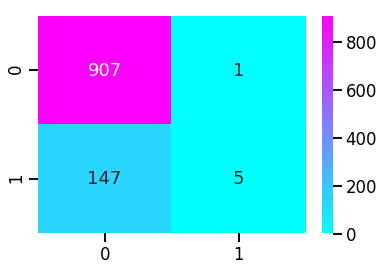

In [28]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_pred))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d')

**Understanding the Metrics :**

- **Accuracy Score** : Accuracy Score in Imbalanced Dataset can be a Trap.
    
    - **Why Accuracy is not our Evaluation Metrics ?**
    - **Ans.:** We get illusion of High Accuracy because our Estimator Learns well from Majority Class and is able to Predict well on Majority Class but not Minority Class leaving us in an illusion of High Accuracy. 0.8603 seems like a good accuracy but it has no value Since we can observe (Refer Confusion Matrix) above that we've Misclassification happening here for Minority Class.


- **Cross-Val Score** : Cross-Validation Scores uses the average of the output, which will be affected by the number of folds. Cross-Validation Scores Help us Identify if our Model is Over / Under-fitting. 


- **Classification Report** : In Classification Report our Important metrics is Precision (TP/TP + FP) & Recall (TP/TP + FN). We can see our Recall Scores is good only for Majority Class but Positive Class has Bad Recall Score.


- **Confusion Matrix** : Diagonal Values of Confusion Matrix are correct. So we can see that In Negative Diagnosis out of 908 the 907 are correctly Classified while only 1 is misclassified, we can also call it as **Type 1 Error**. While, In case of Positive Diagnosis out of 152 examples, 5 are Classified correctly while rest 147 are misclassified as Negative Class. (Below is Interpretation of Confusion Matrix).

![alt text](https://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png)<br>


- **Let us add Class Weight Parameter to our Logistic Regression Estimator and see if it makes any Difference**

In [29]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg_cw = LogisticRegression(solver='liblinear', class_weight='balanced')
log_reg_cw.fit(x_train, y_train)

log_cw_pred = log_reg_cw.predict(x_test)
log_cw_pred

array([1, 1, 0, ..., 0, 1, 0])

Accuracy Score : 0.6443396226415095
Cross Validation Score :  0.6493659233918587
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       908
           1       0.24      0.71      0.36       152

    accuracy                           0.64      1060
   macro avg       0.59      0.67      0.56      1060
weighted avg       0.83      0.64      0.70      1060



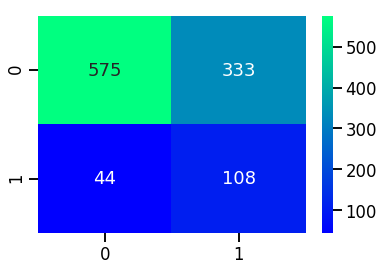

In [30]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_cw_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg_cw, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_cw_pred))

sns.heatmap(confusion_matrix(y_test, log_cw_pred), annot=True, cmap='winter', fmt='d')

**Understanding the Metrics :**

- By adding Class Weight Parameter to our Estimator we've got good Recall Score.


- Also, we can Interpret Confusion Matrix above, Its observable that for Negative Class 575 are Classified Correct & 333 are misclassified. While for Positive Class 108 are Classified correct and 44 are misclassified, It is a better result than our previous prediction. **Type 2 Error** has reduced upto some extent. Type 2 Errors in our case can be threatening. Let me explain how.


- **If Positive Class , i.e, One who actually has CHD is Classified as Negative Class then its a real threat as no actions will be taken on the Subject. It is termed as Type 2 Error. So such Model cannot be deployed in Production.**


- Let us Proceed ahead with Over-Sampling and examine our Metrics.

### Over-Sampling using SMOTE

- SMOTE creates synthetic observations based upon the existing minority observations.


- SMOTE is widely used by Data Science Practioners.

In [31]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

smote = SMOTE(sampling_strategy='not majority')
x_s_res, y_s_res = smote.fit_sample(x_train, y_train)

print (y_train.value_counts(), '\n')
np.bincount(y_s_res)

0    2688
1     492
Name: TenYearCHD, dtype: int64 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


array([2688, 2688])

- Above we've used imblearn's SMOTE which is easiest to implement.


- We're using sampling strategy as "not majority", it is similar to Minority Over-sampling.


- Post-Application we can validate that SMOTE was successful and we've 2688 examples now of each class.

### Logistic Regression Post Over-Sampling

- Let's implement Logistic Regression Again and Interpret our Results.

In [32]:
est_reg = LogisticRegression(solver='liblinear', max_iter=1000, C=1).fit(x_s_res, y_s_res)
est_pred = est_reg.predict(x_test)
est_pred

array([1, 1, 0, ..., 0, 1, 0])

Accuracy Score : 0.65
Cross Validation Score :  0.6770818189999515
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       908
           1       0.25      0.71      0.37       152

    accuracy                           0.65      1060
   macro avg       0.59      0.68      0.56      1060
weighted avg       0.83      0.65      0.70      1060



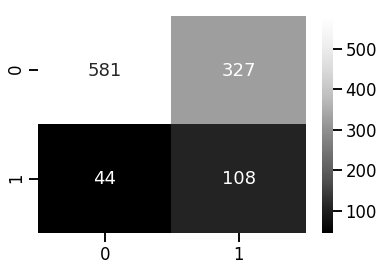

In [33]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, est_pred))
print ('Cross Validation Score : ', cross_val_score(est_reg, x_s_res, y_s_res, cv=5).mean())
print (classification_report(y_test, est_pred))

sns.heatmap(confusion_matrix(y_test, est_pred), annot=True, cmap='Greys_r', fmt='d')

**Understanding the Metrics :**

- From Confusion Matrix above, Its observable that for Negative Class 581 are Classified Correct & 327 are misclassified. While for Positive Class 108 are Classified correct and 44 are misclassified, It is a better result than our previous prediction in case of **Type 1 Error** has reduced upto some extent. Type 2 Errors remains similar.


- **Type 2 Error** : If Positive Class , i.e, One who actually has CHD is Classified as Negative Class then its a real threat as no actions will be taken on the Subject. It is termed as Type 2 Error. So such Model cannot be deployed in Production.

### ROC-AUC (Receiver Operating Characteristics - Area Under Curve)


- It is a performance measurement for classification problem.


- ROC is a probability curve and AUC represents degree or measure of separability.


- It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 


- By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.


- The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

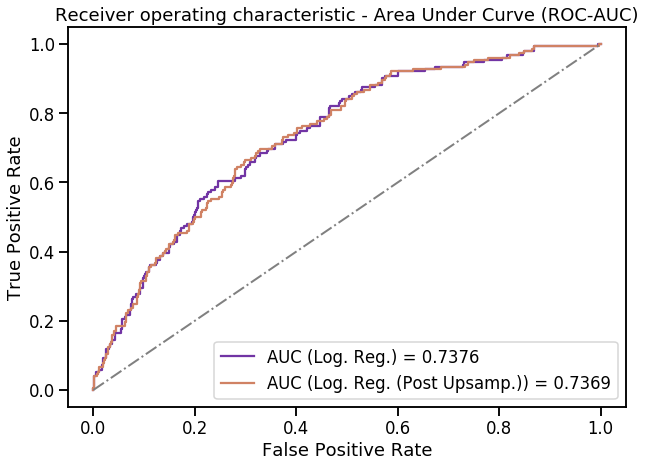

In [35]:
#Roc-Auc

from sklearn.metrics import auc, roc_auc_score, roc_curve

#log_prob = log_reg.predict_proba(x_test)
log_prob_cw = log_reg_cw.predict_proba(x_test)
log_prob_up = est_reg.predict_proba(x_test)

#fpr, tpr, _ = roc_curve(y_test, log_prob[:,1])
fpr_cw, tpr_cw, _ = roc_curve(y_test, log_prob_cw[:,1])
fpr_up, tpr_up, _ = roc_curve(y_test, log_prob_up[:,1])

#log_roc_auc = auc(fpr, tpr)
log_cw_roc_auc = auc(fpr_cw, tpr_cw)
log_up_roc_auc = auc(fpr_up, tpr_up)

plt.figure(figsize=(10,7))

#plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_roc_auc)
plt.plot(fpr_cw, tpr_cw, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_cw_roc_auc)
plt.plot(fpr_up, tpr_up, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg. (Post Upsamp.)) = %0.4f'% log_up_roc_auc)

plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

**Observations :**

- Above we've plotted ROC-AUC for 2 models.


- As mentioned above, the more the ROC-AUC Score the better is the model.


- We can evaluate Models performance based on this. It's clear that Logistic Regression model with Class Weight as "balanced"  is giving us decent Score of 0.7376 followed by Logistic Regression post Over-Sampling which has given us Score of 0.7369.

### Conclusion :

- **We figured out how our dataset was suffering from Class imbalance & so We handled imbalanced dataset with the help of SMOTE.**


- **From business perspective , it can help doctors to take necessary measures for patients carrying high risk of heart disease.**


- **This can also benefit Insurance Companies to some extent, If effective measures are taken then the number of claims can be reduced.**

### What's next ?


- We can also try to **add more Parameters** for **Tuning the model.**


- One can also try to fill **missing values** by **forward / backward** fill.


- One can try also **implement Ensemble method, Tree Algorithm and / or Deep Neural Network** Modelling.